# Fraud Detection on Financial Transactions

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("Fraud (1).csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Data Cleaning
- Dropping irrelevant features: `nameOrig`, `nameDest`
- Checking and handling missing values
- Detecting and optionally treating outliers
- Checking correlation between features

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

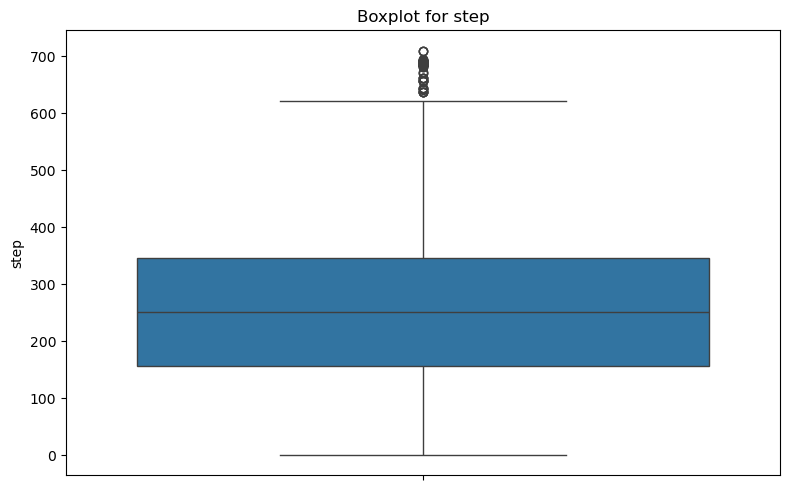

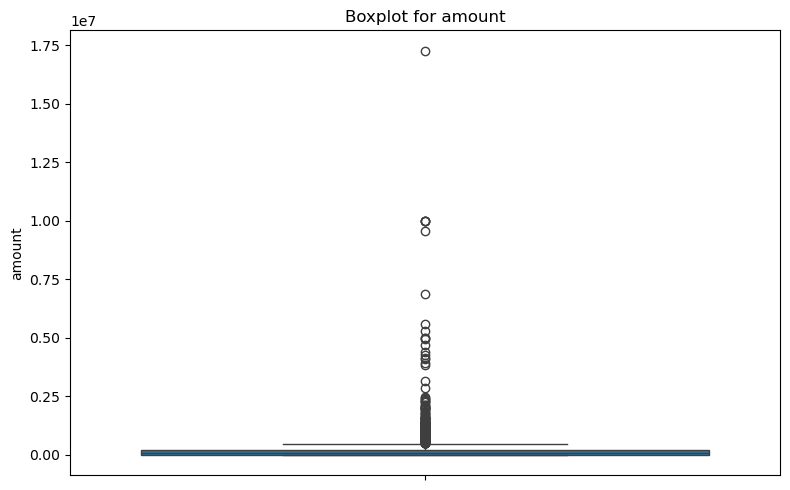

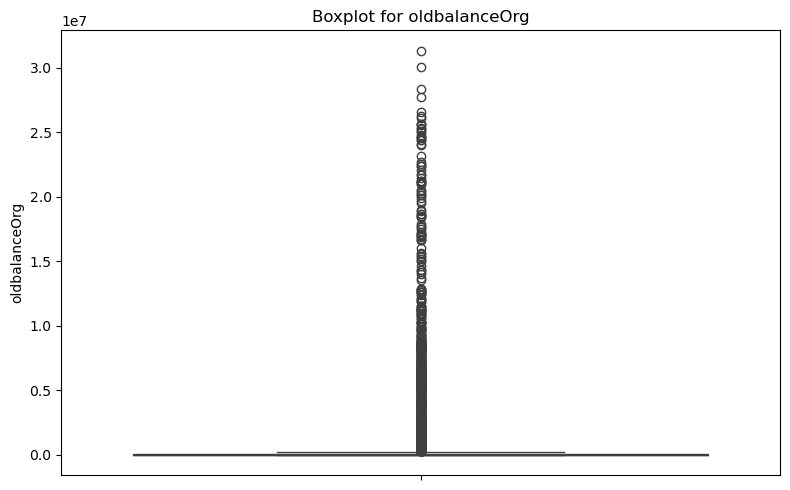

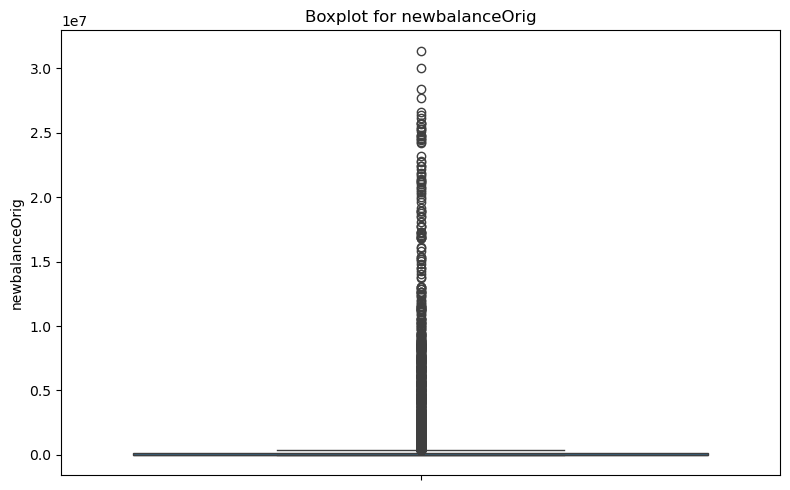

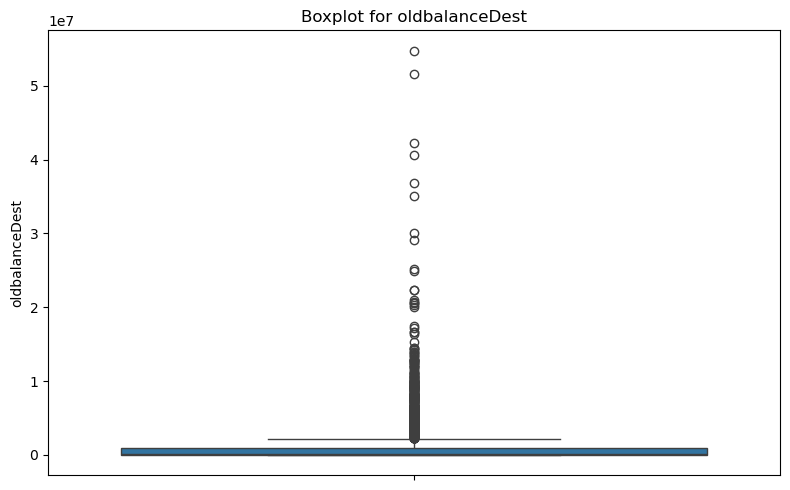

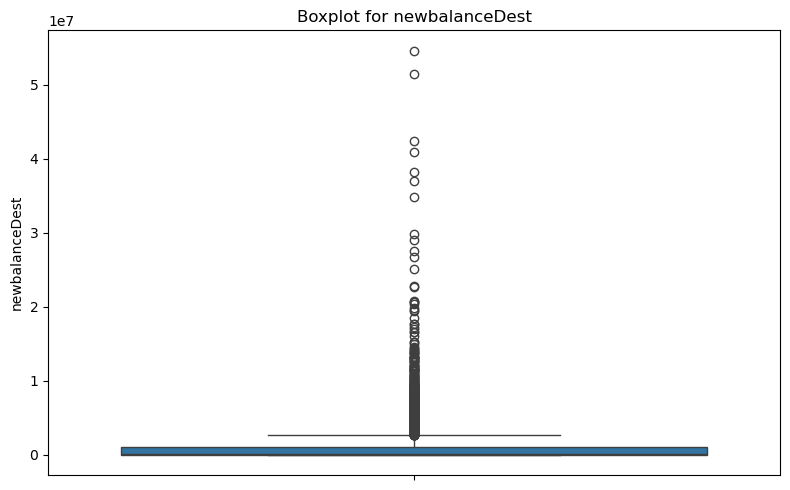

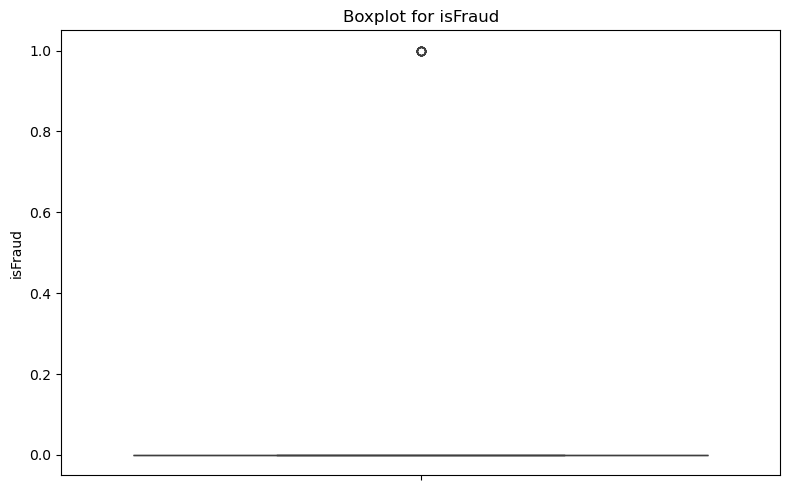

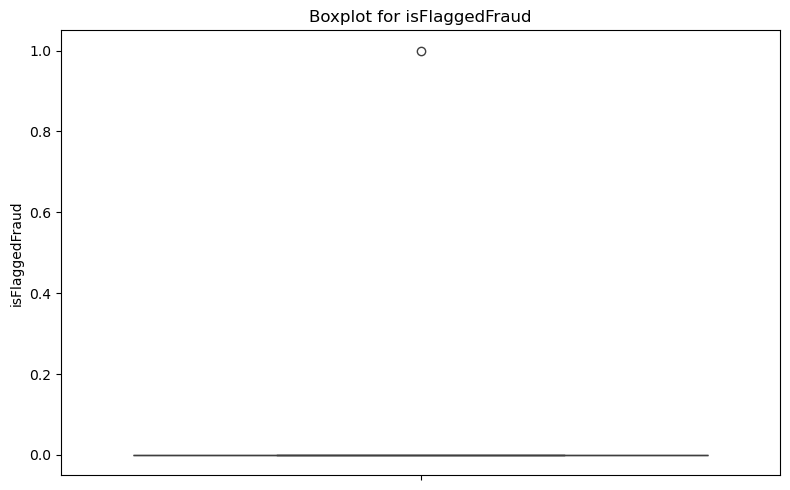

In [7]:
sampled_df=df.sample(n=5000,random_state=42)
numeric_cols=sampled_df.select_dtypes(include=['int64','float64']).columns


for i in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=sampled_df[i])
    plt.title(f'Boxplot for {i}')
    plt.tight_layout()
    plt.show()
    

<Axes: >

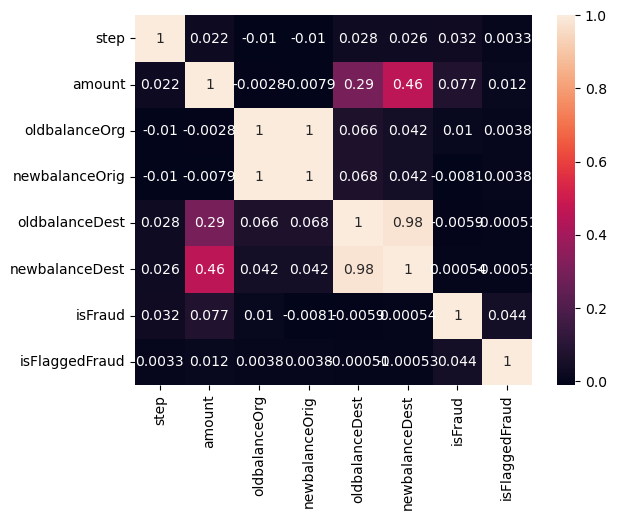

In [8]:
sns.heatmap(df.drop(columns=['type','nameOrig','nameDest']).corr(), annot=True)

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


###  Feature Engineering 
- Class distribution of `isFraud`
- Boxplots, distribution plots
- Correlation heatmap

In [10]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

In [11]:
df['type_encoded'].value_counts()

type_encoded
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [13]:
df.drop('type', axis=1, inplace=True)

In [14]:
df.drop(['nameOrig', 'nameDest',], axis=1, inplace=True)

In [15]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3


In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['isFraud']),df['isFraud'],test_size=0.3,random_state=42)

In [18]:
# model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
# model.fit(x_train,y_train)
# rf_result=model.predict(x_test)

In [19]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,rf_result))

In [20]:
# model = RandomForestClassifier(
#     n_estimators=150,
#     max_depth=7,  # controls tree depth
#     min_samples_split=10,
#     min_samples_leaf=5,
#     max_features='sqrt',
#     class_weight='balanced',
#     random_state=42
# )
# model.fit(x_train, y_train)
# rf_result1 = model.predict(x_test)

In [21]:
# print(classification_report(y_test,rf_result1))

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: isFraud
0    4448056
1       5778
Name: count, dtype: int64
After SMOTE: isFraud
0    4448056
1    4448056
Name: count, dtype: int64


In [29]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train, y_train)

In [31]:
from xgboost import XGBClassifier
import numpy as np 

neg, pos = np.bincount(y_train)
scale = neg / pos

xgb = XGBClassifier(scale_pos_weight=scale, max_depth=5, learning_rate=0.1, n_estimators=150, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(x_test)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906351
           1       0.03      1.00      0.07      2435

    accuracy                           0.96   1908786
   macro avg       0.52      0.98      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786



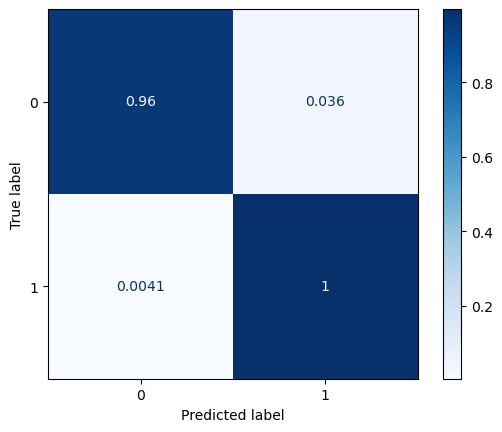

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, xgb.predict(x_test), normalize='true', cmap='Blues')

In [26]:
from sklearn.metrics import precision_score, recall_score

y_probs = xgb.predict_proba(x_test)[:, 1]

for thresh in [0.2, 0.3, 0.4, 0.5]:
    preds = (y_probs >= thresh).astype(int)
    print(f"Threshold: {thresh}")
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("-" * 30)

Threshold: 0.2
Precision: 0.018484358802366
Recall: 0.9958932238193019
------------------------------
Threshold: 0.3
Precision: 0.02230869717208515
Recall: 0.9958932238193019
------------------------------
Threshold: 0.4
Precision: 0.027061409871555947
Recall: 0.9958932238193019
------------------------------
Threshold: 0.5
Precision: 0.031112080468028328
Recall: 0.9958932238193019
------------------------------


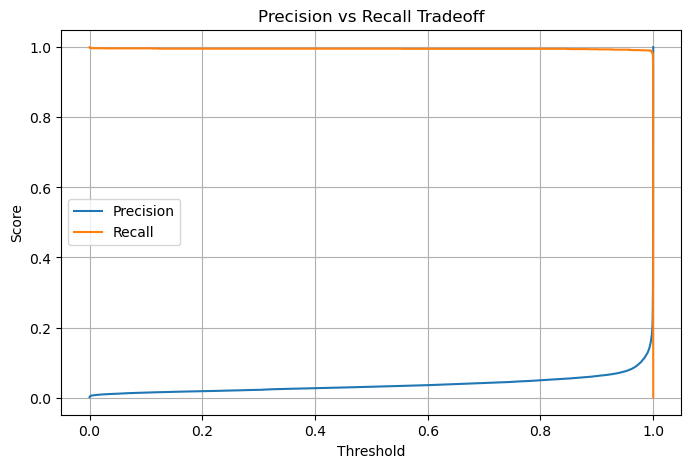

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, thresh = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 5))
plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall Tradeoff")
plt.legend()
plt.grid()
plt.show()

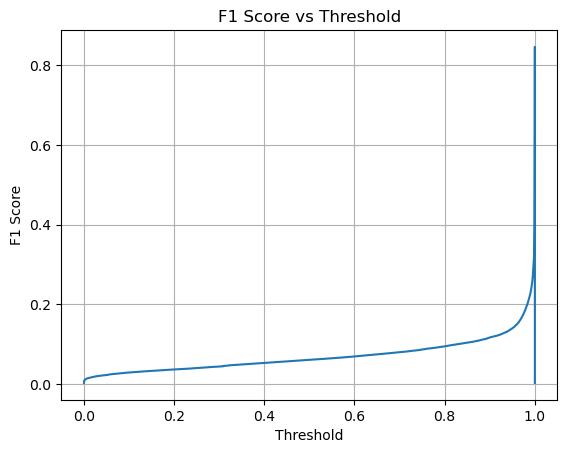

In [28]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thresh = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-10)

plt.plot(thresh, f1_scores[:-1])
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_xgb))

0.9604308707209713


In [37]:
# Step 1: Original split
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Oversample only on training set
from sklearn.utils import resample

train_data = pd.concat([X_train, y_train], axis=1)
fraud = train_data[train_data['isFraud'] == 1]
non_fraud = train_data[train_data['isFraud'] == 0]

fraud_upsampled = resample(
    fraud,
    replace=True,
    n_samples=len(non_fraud),
    random_state=42
)

train_balanced = pd.concat([non_fraud, fraud_upsampled])
train_balanced = train_balanced.sample(frac=1, random_state=42)

X_train_bal = train_balanced.drop("isFraud", axis=1)
y_train_bal = train_balanced["isFraud"]


In [38]:
model = XGBClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.48      0.98      0.64      2464

    accuracy                           1.00   1908786
   macro avg       0.74      0.99      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



In [39]:
y_probs = model.predict_proba(X_test)[:, 1]
y_preds = (y_probs >= 0.6).astype(int)  # Tune threshold

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.52      0.98      0.68      2464

    accuracy                           1.00   1908786
   macro avg       0.76      0.99      0.84   1908786
weighted avg       1.00      1.00      1.00   1908786



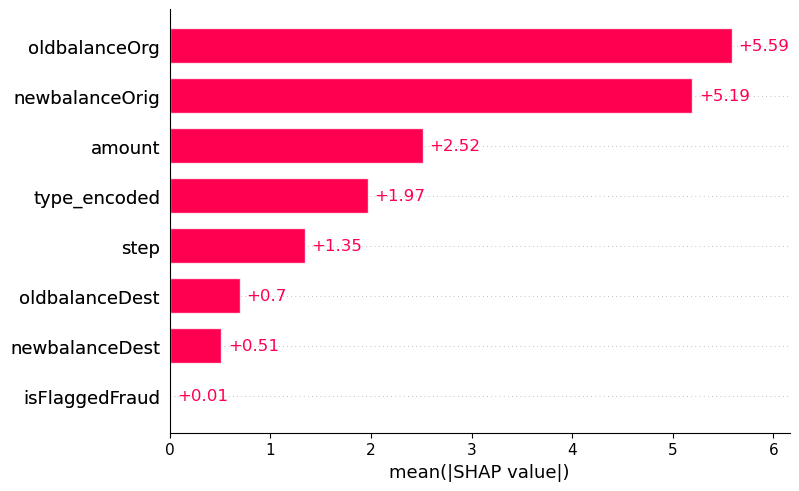

In [42]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)

In [43]:
import joblib
joblib.dump(model, 'fraud_model_xgb.pkl')

['fraud_model_xgb.pkl']